In [82]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
df = pd.read_excel('BBDD.xlsx')

In [84]:
df = df[["sentimiento","review_es"]]

<Axes: >

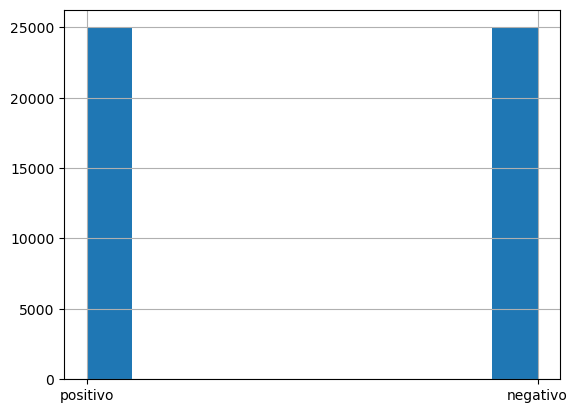

In [85]:
df['sentimiento'].hist()

In [86]:
target_map = {"positivo": 1, "negativo": 0}
df['target'] = df["sentimiento"].map(target_map)

In [87]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [88]:
df_train, df_test = train_test_split(df)

In [89]:
vectorizer = TfidfVectorizer(max_features=2000)
#Vectorizamos con dimensiones máximas de 2000 tokens (las columnas)

In [90]:
#Guardamos la matriz vectorizada de entrenamiento con los datos ccorrespondientes
X_train = vectorizer.fit_transform(df_train['review_es'])

In [91]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3459222 stored elements in Compressed Sparse Row format>

In [92]:
X_test = vectorizer.transform(df_test['review_es'])

In [93]:
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1159773 stored elements in Compressed Sparse Row format>

In [94]:
Y_train = df_train['target']
Y_test = df_test['target']

In [95]:
#Crear el modelo de regresión logística
model = LogisticRegression(max_iter=6000)

In [96]:
#Entrenar el modelo de regresión logística
model.fit(X_train, Y_train)

LogisticRegression(max_iter=6000)

In [97]:
#Imprimimos la precisión (accuracy) del modelo con los scores que importamos
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8808
Test acc: 0.86312


In [98]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [99]:
#calcular matriz de confusión
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.87019924, 0.12980076],
       [0.10863198, 0.89136802]])

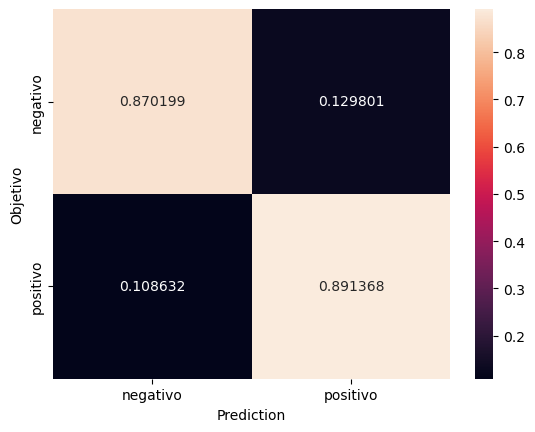

In [100]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

In [101]:
#calcular matriz de confusión
cmTest = confusion_matrix(Y_test, P_test, normalize='true')
cmTest

array([[0.85109094, 0.14890906],
       [0.12473879, 0.87526121]])

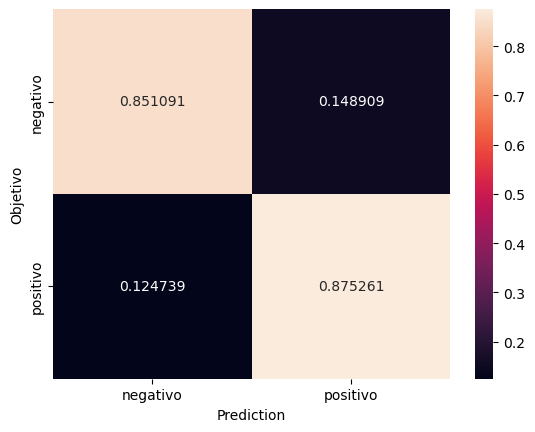

In [102]:
plot_cm(cmTest)

In [103]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'disfruté': 519,
 'esta': 666,
 'película': 1367,
 'pensé': 1373,
 'que': 1514,
 'era': 617,
 'un': 1870,
 'excelente': 710,
 'thriller': 1803,
 'sobre': 1694,
 'algo': 69,
 'nunca': 1281,
 'había': 849,
 'antes': 111,
 'agente': 56,
 'de': 437,
 'secreto': 1625,
 'va': 1888,
 'mal': 1104,
 'en': 584,
 'una': 1871,
 'trama': 1845,
 'asesinato': 139,
 'desafortunadamente': 465,
 'para': 1340,
 'el': 569,
 'personaje': 1393,
 'michael': 1158,
 'es': 622,
 'pero': 1389,
 'él': 1992,
 'no': 1255,
 'solo': 1701,
 'tiene': 1809,
 'asunto': 145,
 'con': 351,
 'la': 1029,
 'primera': 1457,
 'dama': 428,
 'dado': 427,
 'está': 691,
 'haciendo': 856,
 'eso': 644,
 'puede': 1501,
 'dar': 432,
 'lo': 1072,
 'hace': 851,
 'número': 1282,
 'uno': 1876,
 'cuando': 408,
 'se': 1622,
 'revela': 1574,
 'hay': 866,
 'matar': 1130,
 'al': 65,
 've': 1900,
 'obligada': 1285,
 'ir': 986,
 'mismo': 1176,
 'tiempo': 1806,
 'todavía': 1820,
 'hacer': 853,
 'correcto': 381,
 'buen': 221,
 'trabajo': 1841,
 'es

In [104]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
disfruté 4.05991773110187
excelente 7.895052383375344
mejores 4.003240141651786
increíble 4.122733234033715
gran 4.720389648622267
hoy 4.743421870174661
excelentes 4.240007382691791
encantó 5.075872193418955
maravillosa 4.012225728572708
brillante 4.569982290096989
perfecto 4.692512317406536
definitivamente 4.039387331912423
hilarante 4.237357476716645


In [105]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
mal -5.46388160615012
desafortunadamente -4.983061064626706
no -4.191744485970997
horrible -8.989859377835206
terrible -7.2238149162406105
predecible -4.148459746385246
nada -4.054006535576405
aburrida -6.518750316721491
minutos -4.149546506833753
basura -5.019273038758134
mala -7.278898417327036
peor -10.5425744720347
siquiera -4.285224731905294
aburrido -6.691405698040358
decepción -5.2153840537148275
pobre -5.3629856206805115
estúpida -4.504585635035984
peores -7.262343659300992
decepcionante -4.510678935021302


In [106]:
prueba = ["Estuvo muy entretenida la película", "estuvo horrible la película", "me aburrí mucho", "no la recomiendo"]

In [107]:
#Transformar en vectores
x = vectorizer.transform(prueba)

In [108]:
P = model.predict(x)

In [109]:
clases = model.classes_

In [110]:
for i in range (len(prueba)):
    if clases[P_train[i]] == 0:
        print(f"el comentario:'{prueba[i]}' es negativo")
    else:
        print(f"el comentario:'{prueba[i]}' es positivo")                

el comentario:'Estuvo muy entretenida la película' es positivo
el comentario:'estuvo horrible la película' es negativo
el comentario:'me aburrí mucho' es positivo
el comentario:'no la recomiendo' es positivo


In [111]:
#Multiclase:

In [112]:
dfMulti = pd.read_csv('Twitter_Data.csv')

<Axes: >

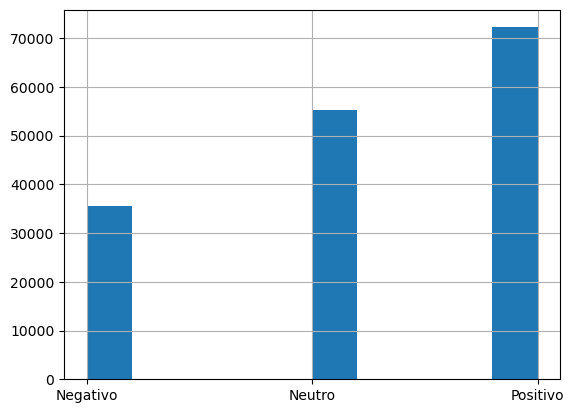

In [113]:
dfMulti['category'].hist()

In [114]:
target_map = {'Positivo': 1,'Negativo': 0, 'Neutro': 2}
dfMulti['target'] = dfMulti['category'].map(target_map)

In [115]:
dfMulti_train, dfMulti_test = train_test_split(dfMulti)

In [116]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(dfMulti_train['clean_text'])
X_train 

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1765523 stored elements in Compressed Sparse Row format>

In [117]:
X_test = vectorizer.transform(dfMulti_test['clean_text'])
X_test


<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 587265 stored elements in Compressed Sparse Row format>

In [118]:
Y_train = dfMulti_train['target']
Y_test = dfMulti_test['target']

In [119]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8970104560404497
Test acc: 0.8936232880074616


In [120]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [121]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.75671198, 0.12158753, 0.12170049],
       [0.03627781, 0.90464907, 0.05907313],
       [0.00885321, 0.01384981, 0.97729698]])

In [122]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sn.heatmap(df_cm, annot= True, fmt = 'g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

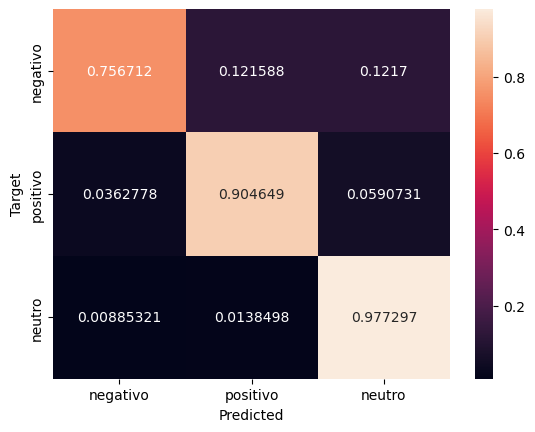

In [123]:
plot_cm(cm)